In [4]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from scipy.special import inv_boxcox

# Load dataset
df = pd.read_csv('../data/data.csv')

# Label encoding for 'Country' due to high dimensionality
#label_encoder = LabelEncoder()
#df['Country'] = label_encoder.fit_transform(df['Country'])

# One-hot encoding for 'Region' due to low dimensionality
#df_encoded = pd.get_dummies(df, columns=['Region'], drop_first=True)
#df_encoded = df_encoded.astype(int)

# Separate features and target variable
X = df.drop(columns=['Life_expectancy', 'Country', 'Year', 'Region'])
y = df['Life_expectancy']

# Apply Box-Cox transformation to the target (Life Expectancy)
# Box-Cox only accepts positive values, which are satisfied in life expectancy data
y_boxcox, lambda_val = boxcox(y)  # Store the lambda value for inverse transformation later if needed

# Updated feature matrix (X) and transformed target (y_boxcox)
X_transformed = X
y_transformed = pd.Series(y_boxcox, name="Life_expectancy_BoxCox")

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_transformed, test_size=0.2, random_state=42)

# Scale the features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Inverse transform the predictions
y_pred_rf_inv = inv_boxcox(y_pred_rf, lambda_val)

# Inverse transform the testing set target values
y_test_inv = inv_boxcox(y_test, lambda_val)

# Recalculate the error metrics using the inverse-transformed values
mae_rf_inv = mean_absolute_error(y_test_inv, y_pred_rf_inv)
mse_rf_inv = mean_squared_error(y_test_inv, y_pred_rf_inv)
r2_rf_inv = r2_score(y_test_inv, y_pred_rf_inv)

# Print the recalculated evaluation metrics
print("Random Forest Regression Results:")
print(f"Mean Absolute Error (MAE): {mae_rf_inv:.4f}")
print(f"Mean Squared Error (MSE): {mse_rf_inv:.4f}")
print(f"R² Score: {r2_rf_inv:.4f}")

Random Forest Regression Results:
Mean Absolute Error (MAE): 0.3564
Mean Squared Error (MSE): 0.2459
R² Score: 0.9970


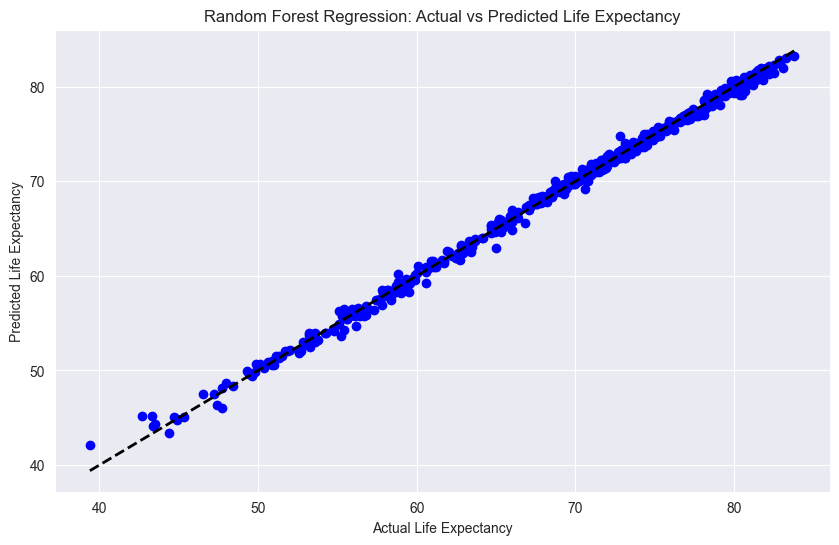

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_inv, y_pred_rf_inv, color='blue')
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], 'k--', lw=2)
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Random Forest Regression: Actual vs Predicted Life Expectancy")
plt.show()